In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Wczytanie danych

In [2]:
train = pd.read_csv(os.path.join('data', 'train.csv'))
test = pd.read_csv(os.path.join('data', 'test.csv'))
# train_additional = pd.read_csv(os.path.join('data', 'train_layer.csv'))

# train_additional.info()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 80 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        8071 non-null   object 
 1   site_id                                                   8071 non-null   object 
 2   site_latitude                                             8071 non-null   float64
 3   site_longitude                                            8071 non-null   float64
 4   city                                                      8071 non-null   object 
 5   country                                                   8071 non-null   object 
 6   date                                                      8071 non-null   object 
 7   hour                                                      8071 non-null   int64  
 8   sulphurdioxide_so2

### Rozbicie daty na składowe

In [4]:
def change_date(dataframe, sin_cos=True):
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    dataframe['dayofweek'] = dataframe['date'].dt.dayofweek.astype(np.int64)
    dataframe['week'] = dataframe['date'].dt.isocalendar().week.astype(np.int64)
    dataframe['year'] = dataframe['date'].dt.year.astype(np.int64)
    if 'month' not in dataframe.columns:
        dataframe['month'] = dataframe['date'].dt.month.astype(np.int64)
    # if sin_cos:
    #     dataframe['sin_dayofweek'] = np.sin(2 * np.pi * dataframe['dayofweek'] / 7)
    #     dataframe['cos_dayofweek'] = np.cos(2 * np.pi * dataframe['dayofweek'] / 7)
    #     dataframe['sin_week'] = np.sin(2 * np.pi * dataframe['week'] / 52)
    #     dataframe['cos_week'] = np.cos(2 * np.pi * dataframe['week'] / 52)
    #     dataframe['sin_month'] = np.sin(2 * np.pi * dataframe['month'] / 12)
    #     dataframe['cos_month'] = np.cos(2 * np.pi * dataframe['month'] / 12)
        
    return dataframe


train, test = change_date(train), change_date(test)
# train = train[(train['date'] >= test['date'].min()) & (train['date'] <= test['date'].max())]
# train.reset_index(drop=True, inplace=True)
# train_additional = change_date(train_additional)

### Wykres przedstawiający wartość pm2_5 w zarejestrowanych godzinach

Text(0.5, 1.0, 'Jakość powietrza w poszczególnych godzinach')

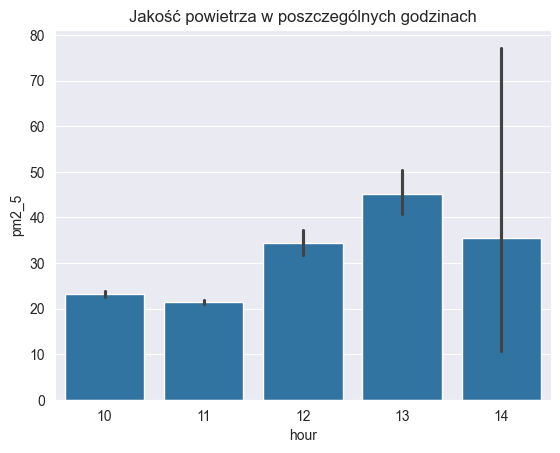

In [5]:
sns.barplot(data=train, x='hour', y='pm2_5')
plt.title('Jakość powietrza w poszczególnych godzinach')

### Wykres przedstawiający wartość pm2_5 w zależności od dnia tygodnia

Text(0.5, 1.0, 'Jakość powietrza w każdym dniu tygodnia')

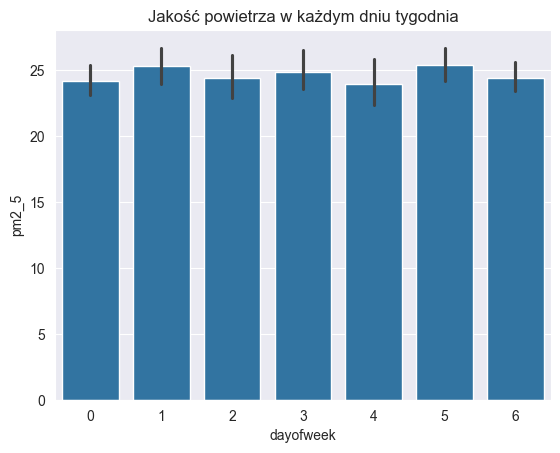

In [6]:
sns.barplot(data=train, x='dayofweek', y='pm2_5')
plt.title('Jakość powietrza w każdym dniu tygodnia')

### Wykres przedstawiający wartość pm2_5 w zależności od miesiąca

Text(0.5, 1.0, 'Jakość powietrza w każdym miesiącu')

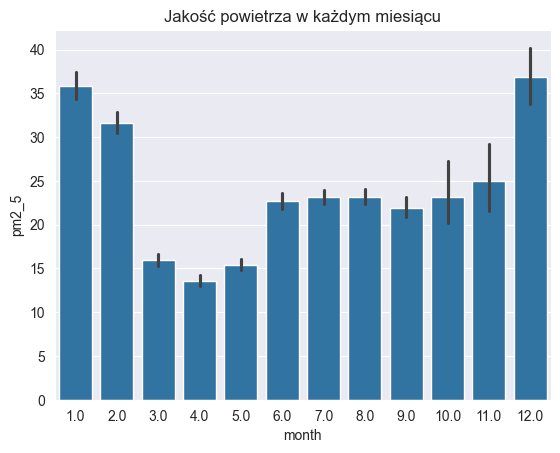

In [7]:
sns.barplot(data=train, x='month', y='pm2_5')
plt.title('Jakość powietrza w każdym miesiącu')

### Korelacja wybranych kolumn z pm2_5

<Axes: >

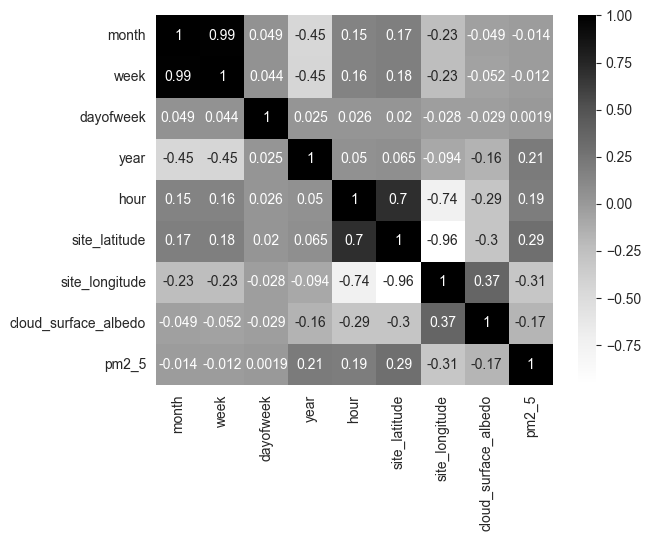

In [8]:
sns.heatmap(train[['month', 'week', 'dayofweek', 'year', 'hour', 'site_latitude', 'site_longitude', 'cloud_surface_albedo', 'pm2_5']].corr(), annot=True, cmap='Greys')

### Wykres przedstawiający wartości pm2_5 w poszczególnych miastach

Text(0.5, 1.0, 'Jakość powietrza w kolejnych dniach')

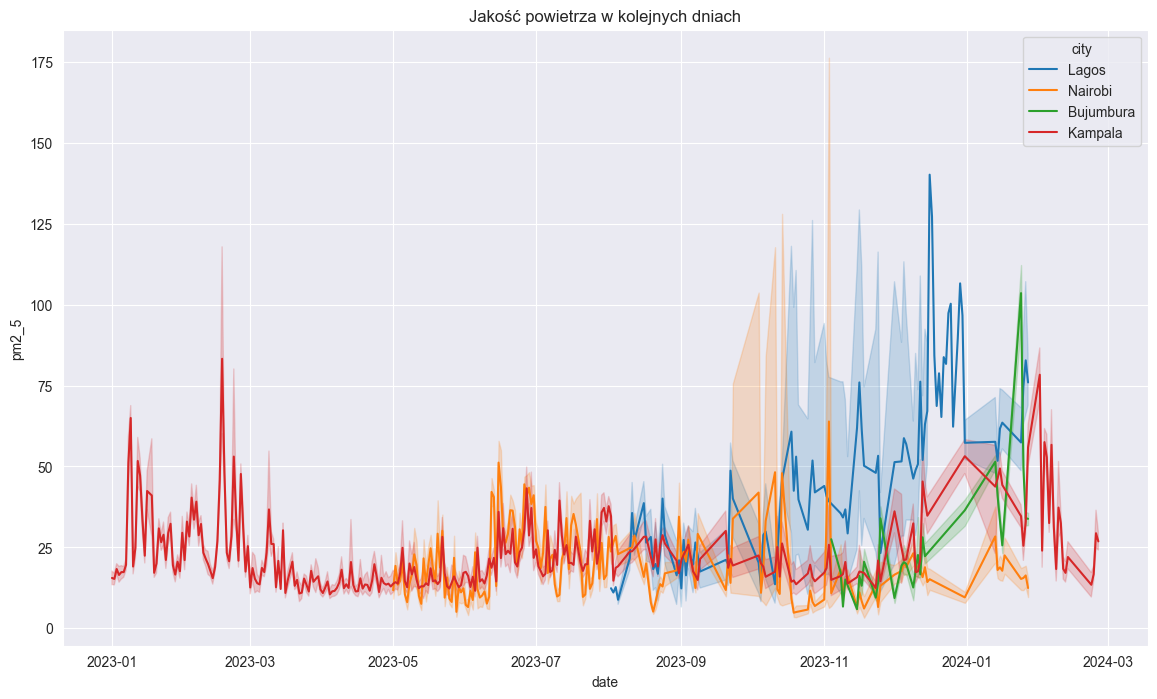

In [9]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=train, x='date', y='pm2_5', hue='city')
plt.title('Jakość powietrza w kolejnych dniach')

### Wartości pm2_5 dla Lagos z podziałem na site_id

<Axes: ylabel='Frequency'>

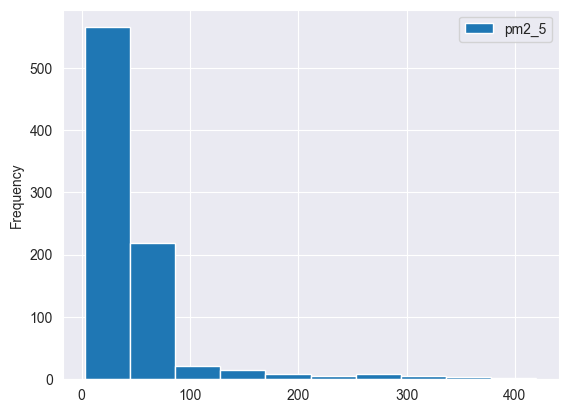

In [10]:
only_lagos = train[train['city'] == 'Lagos'][['site_id', 'pm2_5']]

only_lagos.plot(kind='hist', x='site_id')

### Kolumna ozone_o3_effective_temperature

In [11]:
train['ozone_o3_effective_temperature'].describe()

count    7959.000000
mean      228.241939
std         3.792421
min       208.920700
25%       225.923290
50%       228.382021
75%       230.770572
max       242.670975
Name: ozone_o3_effective_temperature, dtype: float64

In [12]:
ozone_o3_effective_temperature = train.loc[train['ozone_o3_effective_temperature'].isna(), ['city', 'week', 'dayofweek', 'month', 'pm2_5']].copy(deep=True)

In [13]:
ozone_o3_effective_temperature.groupby('city')['month'].value_counts()

city     month
Kampala  2.0      51
         9.0      21
         4.0      15
         3.0       9
         12.0      7
         8.0       5
Nairobi  10.0      4
Name: count, dtype: int64

In [14]:
train.groupby(['city', 'month'])['ozone_o3_effective_temperature'].mean()

city       month
Bujumbura  1.0      228.247819
           11.0     231.206285
           12.0     227.721795
Kampala    1.0      225.454657
           2.0      226.134402
           3.0      227.363304
           4.0      228.904314
           5.0      229.573469
           6.0      229.278934
           7.0      227.130836
           8.0      227.222465
           9.0      228.670061
           10.0     226.763027
           11.0     228.939630
           12.0     228.221345
Lagos      1.0      229.947540
           8.0      228.487380
           9.0      229.344338
           10.0     228.777122
           11.0     229.534387
           12.0     231.385351
Nairobi    1.0      227.156328
           5.0      230.533066
           6.0      230.309962
           7.0      228.873172
           8.0      228.567606
           9.0      230.123864
           10.0     228.630900
           11.0     230.674851
           12.0     228.708108
Name: ozone_o3_effective_temperature, dtype: float64

## <center>Czyszczenie danych</center>
### 1. Imputacja, usuwanie kolumn, oraz inne cuda

In [15]:
from sklearn.impute import KNNImputer


def fill_train(column_name='dayofweek'):
    column_values = train[column_name].unique()
    for date in column_values:
        for i, column in enumerate(starts_with):
            similar_columns = [col for col in train.columns if col.startswith(column)]
            df = train.loc[train[column_name] == date, similar_columns].copy()
            if not df.empty:
                try:
                    train.loc[train[column_name] == date, similar_columns] = imputers[i].fit_transform(df)
                except ValueError:
                    train.drop(index=df.index, inplace=True)
                    train.reset_index(drop=True, inplace=True)

def fill_test(column_name='dayofweek'):
    column_values = test[column_name].unique()
    for date in column_values:
        for i, column in enumerate(starts_with):
            similar_columns = [col for col in test.columns if col.startswith(column)]
            df = test.loc[test[column_name] == date, similar_columns].copy()
            if not df.empty:
                test.loc[test[column_name] == date, similar_columns] = imputers[i].transform(df)

def drop_high_nans():  # usuwamy kolumny o dużej liczbie wartości NaN
    columns_nans = []
    for i, el in enumerate(train.columns):
        if train[el].isna().sum() / len(train) >= 0.9:
            columns_nans.append(el)
    return columns_nans

def drop_high_correlated_columns():
    matrix = train.corr(numeric_only=True).abs()
    upper_t = matrix.where(np.triu(np.ones_like(matrix, dtype=np.bool_), k=1))
    return [col for col in upper_t.columns if any(upper_t[col] > 0.99)]

def drop_low_correlated_columns_to_pm2_5():
    corr = train.corr()['pm2_5'].to_frame()
    return corr[(corr['pm2_5'] < 0.01) & (corr['pm2_5'] > -0.01)].index.to_numpy()

def subract_azimuth_zenith(dataframe):
    zenith_columns = [zenith for zenith in dataframe.columns if 'zenith' in zenith]
    azimuth_columns = [azimuth for azimuth in dataframe.columns if 'azimuth' in azimuth]
    for i, zenith in enumerate(zenith_columns):
        splitted = zenith.split('_')
        dataframe[f'{splitted[0]}_{splitted[1]}_diff'] = dataframe[zenith] - dataframe[azimuth_columns[i]]
        dataframe.drop(zenith_columns[i], axis=1, inplace=True)
        dataframe.drop(azimuth_columns[i], axis=1, inplace=True)
    return dataframe


starts_with = train.columns.str.split('_', expand=True).levels[0].to_frame()
starts_with.drop(['month', 'pm2'], inplace=True)
starts_with = starts_with[0].tolist()

imputers = [KNNImputer(n_neighbors=15, weights='distance') for _ in range(len(starts_with))]
high_nans = drop_high_nans()
train, test = train.drop(columns=high_nans, axis=1), test.drop(columns=high_nans, axis=1)
# fill_train(), fill_test()
# to_drop = drop_low_correlated_columns_to_pm2_5()
# to_drop = np.concatenate((to_drop, drop_high_correlated_columns()), axis=0)
# train, test = train.drop(columns=to_drop, axis=1), test.drop(columns=to_drop, axis=1)
# train, test = subract_azimuth_zenith(train), subract_azimuth_zenith(test)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   id                                                        8071 non-null   object        
 1   site_id                                                   8071 non-null   object        
 2   site_latitude                                             8071 non-null   float64       
 3   site_longitude                                            8071 non-null   float64       
 4   city                                                      8071 non-null   object        
 5   country                                                   8071 non-null   object        
 6   date                                                      8071 non-null   datetime64[ns]
 7   hour                                      

### Połączenie danych z innych konkursów

In [16]:
# train_additional.drop(columns=['ID', 'humidity', 'temp_mean', 'device', 'site_latitude', 'site_longitude', 'date'], inplace=True)
# 
# for name in train_additional.columns.values:
#     name_parts = name.split('_')
#     name_parts_lower = [x.lower() for x in name_parts]
#     train_additional.rename(columns={name: '_'.join(name_parts_lower)}, inplace=True)
# 
# train = pd.concat([train, train_additional])
# train.reset_index(drop=True, inplace=True)
# 
# train.info()

### Wykresy pudełkowe wskazujące wartości odstające

In [17]:
from sympy import divisors


def plot_boxplots():
    for i, column_group in enumerate(starts_with):
        similar_columns = [col for col in train.columns if col.startswith(column_group)]
        if len(similar_columns) > 1:
            divs = divisors(len(similar_columns))
            if len(divs) % 2 == 0:
                rows, cols = divs[(len(divs) // 2) - 1], divs[len(divs) // 2]
            else:
                rows, cols = divs[len(divs) // 2], divs[len(divs) // 2]
            fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(40, 30), squeeze=False)
            fig.suptitle(column_group, fontsize=25)
            for j, column in enumerate(similar_columns):
                x_cord, y_cord = divmod(j, cols)
                train[column].plot(kind='box', ax=ax[x_cord, y_cord], fontsize=15)
            plt.show()


vertical_columns = [col for col in train.columns if 'number_density' in col]

# plot_boxplots()

### 2. Wskazanie kwantyli, od których są outliery

In [18]:
from scipy.stats import zscore


detect_outliers = zscore(train['pm2_5'])

quantiles = pd.DataFrame(list(zip(np.linspace(0.95, 1, 20), [np.quantile(detect_outliers, el) for el in np.linspace(0.95, 1, 20)])), columns=['quantile', 'zscore'])
quantiles

,quantile,zscore
0,0.950000,1.300115
1,0.952632,1.337904
2,0.955263,1.377168
3,0.957895,1.417091
4,0.960526,1.459806
5,0.963158,1.485354
6,0.965789,1.533559
7,0.968421,1.620929
8,0.971053,1.670990
9,0.973684,1.752211


### 3. Usunięcie wartości odstających

In [19]:
def del_pm2_5_outliers():
    indexes_to_drop = []
    q1, q2 = np.quantile(detect_outliers, 0.01), np.quantile(detect_outliers, 0.99)
    for i, el in enumerate(detect_outliers):
        if el > q2:
            indexes_to_drop.append(i)
    train.drop(indexes_to_drop, inplace=True)
    train.reset_index(drop=True, inplace=True)
    
def scale_pm2_5_outliers():
    out = train[zscore(train['pm2_5']) > np.quantile(detect_outliers, 0.99)]['pm2_5'].copy(deep=True)
    out *= 0.6
    train.loc[out.index, 'pm2_5'] = out


# scale_pm2_5_outliers()
del_pm2_5_outliers()

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7990 entries, 0 to 7989
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   id                                                        7990 non-null   object        
 1   site_id                                                   7990 non-null   object        
 2   site_latitude                                             7990 non-null   float64       
 3   site_longitude                                            7990 non-null   float64       
 4   city                                                      7990 non-null   object        
 5   country                                                   7990 non-null   object        
 6   date                                                      7990 non-null   datetime64[ns]
 7   hour                                      

### Usuwanie outlierów na podstawie rady marching_learning

In [20]:
joined = pd.merge(only_lagos, detect_outliers, left_index=True, right_index=True)
outliers_from_lagos = joined[joined['pm2_5_y'] > 3.0]['site_id'].value_counts()
site_ids_to_del = outliers_from_lagos.keys()[:2]
outliers_from_lagos

site_id
652c59739beea7001a7548b4    33
6531a46a89b3300013914a36    15
64db3e98149b3c001a52c89e     7
640f0b9e1663d3001e40bd00     5
Name: count, dtype: int64

In [21]:
# indexes = train[train['site_id'].isin(site_ids_to_del)].index
# train.drop(index=indexes, inplace=True)
# train.reset_index(drop=True, inplace=True)

# train.info()

## <center>Selekcja cech</center>

In [22]:
from sklearn.feature_selection import RFECV, RFE, SelectKBest, mutual_info_regression, f_regression
from sklearn.ensemble import RandomForestRegressor


def plot_feature_importance(sc, num_of_features):
    if isinstance(sc, RFECV) or isinstance(sc, RFE):
        scores = dict(zip(sc.feature_names_in_, sc.ranking_))
    else:
        scores = dict(zip(sc.feature_names_in_, sc.scores_))
    scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:num_of_features]
    scores_df = pd.DataFrame(scores, columns=['Feature', 'Score'])

    scores_df.plot(kind='bar', x='Feature', y='Score', figsize=(10, 6), rot=90, title='Oceny wybranych cech')
    plt.xlabel('Cecha')
    plt.ylabel('Ocena')


# selector = RFE(
#     estimator=RandomForestRegressor(
#         n_estimators=700, 
#         max_depth=7, 
#         random_state=4, 
#         n_jobs=-1, 
#         oob_score=True,
#         warm_start=True
#     ),
#     n_features_to_select=k,
# )
# k = 17
# selector = RFECV(
#     estimator=RandomForestRegressor(
#         n_estimators=400, 
#         max_depth=10, 
#         random_state=4, 
#         n_jobs=-1, 
#         oob_score=True, 
#         warm_start=True, 
#         ccp_alpha=1e-4
#     ),
#     min_features_to_select=k, 
#     cv=10, 
#     scoring='neg_root_mean_squared_error',
#     n_jobs=-1
# )
# selector.fit(train, y)
# train, test = selector.transform(train), selector.transform(test)
# 
# plot_feature_importance(selector, k)

## <center>Transformacja danych</center>
### 1. Standaryzacja danych

In [23]:
from sklearn.preprocessing import StandardScaler, RobustScaler, TargetEncoder
from sklearn.compose import make_column_transformer


test_ids = test['id']
train.drop(columns=['id', 'city', 'date', 'country', 'site_id', 'site_latitude', 'site_longitude', 'hour'], inplace=True)
test.drop(columns=['id', 'city', 'date', 'country', 'site_id', 'site_latitude', 'site_longitude', 'hour'], inplace=True)

train_pm2_5 = train['pm2_5']
train.drop(columns=['pm2_5'], inplace=True)

#### Z podziałem na kategoryczne

In [24]:
# categorical = ['month', 'dayofweek', 'week', 'year']
# train[categorical] = train[categorical].astype('category')
# test[categorical] = test[categorical].astype('category')
# 
# non_cat_columns = train.columns.difference(categorical)
# 
# non_cat_scaler = make_column_transformer((RobustScaler(), non_cat_columns))
# te = TargetEncoder(random_state=4)
# 
# train_cat, test_cat = te.fit_transform(train[categorical], train_pm2_5), te.transform(test[categorical])
# 
# train = pd.concat([pd.DataFrame(non_cat_scaler.fit_transform(train[non_cat_columns]), columns=non_cat_scaler.feature_names_in_), pd.DataFrame(train_cat, columns=te.feature_names_in_), train_pm2_5], axis=1)
# test = pd.concat([test_ids, pd.DataFrame(non_cat_scaler.transform(test[non_cat_columns]), columns=non_cat_scaler.feature_names_in_), pd.DataFrame(test_cat, columns=te.feature_names_in_)], axis=1)

# train = train.round(decimals=3)

#### Wszystkie kolumny

In [25]:
scaler = StandardScaler()

train, test = scaler.fit_transform(train), scaler.transform(test)
train, test = pd.concat([pd.DataFrame(train, columns=scaler.feature_names_in_), train_pm2_5], axis=1), pd.concat([test_ids, pd.DataFrame(test, columns=scaler.feature_names_in_)], axis=1)

### Zapis przekształconych danych

In [26]:
if 'transform' not in os.listdir(os.getcwd()):
    os.mkdir('transform')
train.to_csv(os.path.join('transform', 'train.csv'), index=False)
test.to_csv(os.path.join('transform', 'test.csv'), index=False)

### Po prostu xd

In [29]:
xd = pd.read_csv(os.path.join('data', 'xd.csv'), header=0)
xd['pm2_5'] *= 1.05
xd.to_csv(os.path.join('data', 'xd1.csv'), index=False)